In [1]:
from copy import copy, deepcopy

import numpy as np
from baseClasses.BaseEffect import BaseEffect
from settings.BaseConfiguration import Configuration
from baseClasses.RelicStats import RelicStats
from estimator.DefaultEstimator import DefaultEstimator, DotEstimator
from visualizer.visualizer import visualize

from characters.destruction.Arlan import Arlan
from characters.destruction.Blade import Blade
from characters.destruction.Clara import Clara
from characters.destruction.Hook import Hook
from characters.destruction.Jingliu import Jingliu
from characters.destruction.Lunae import Lunae

from characters.erudition.Argenti import Argenti
from characters.erudition.Herta import Herta
from characters.erudition.Himeko import Himeko
from characters.erudition.JingYuan import JingYuan
from characters.erudition.Serval import Serval
from characters.erudition.Qingque import Qingque

from characters.harmony.Tingyun import Tingyun
from characters.harmony.Bronya import Bronya

from characters.hunt.DanHeng import DanHeng
from characters.hunt.Seele import Seele
from characters.hunt.Sushang import Sushang
from characters.hunt.Topaz import Topaz
from characters.hunt.Yanqing import Yanqing

from characters.nihility.Guinaifen import Guinaifen
from characters.nihility.Kafka import Kafka
from characters.nihility.Luka import Luka
from characters.nihility.Sampo import Sampo
from characters.nihility.SilverWolf import SilverWolf
from characters.nihility.Welt import Welt

from lightCones.destruction.ASecretVow import ASecretVow
from lightCones.destruction.BrighterThanTheSun import BrighterThanTheSun
from lightCones.destruction.IShallBeMyOwnSword import IShallBeMyOwnSword
from lightCones.destruction.NowhereToRun import NowhereToRun
from lightCones.destruction.OnTheFallOfAnAeon import OnTheFallOfAnAeon
from lightCones.destruction.SomethingIrreplaceable import SomethingIrreplaceable
from lightCones.destruction.TheMolesWelcomeYou import TheMolesWelcomeYou
from lightCones.destruction.TheUnreachableSide import TheUnreachableSide
from lightCones.destruction.UnderTheBlueSky import UnderTheBlueSky
from lightCones.destruction.WoofWalkTime import WoofWalkTime

from lightCones.erudition.BeforeDawn import BeforeDawn
from lightCones.erudition.GeniusesRepose import GeniusesRepose
from lightCones.erudition.MakeTheWorldClamor import MakeTheWorldClamor
from lightCones.erudition.NightOnTheMilkyWay import NightOnTheMilkyWay
from lightCones.erudition.TheBirthOfTheSelf import TheBirthOfTheSelf
from lightCones.erudition.TheSeriousnessOfBreakfast import TheSeriousnessOfBreakfast
from lightCones.erudition.TodayIsAnotherPeacefulDay import TodayIsAnotherPeacefulDay

from lightCones.harmony.ButTheBattleIsntOver import ButTheBattleIsntOver
from lightCones.harmony.CarveTheMoonWeaveTheClouds import CarveTheMoonWeaveTheClouds
from lightCones.harmony.DanceDanceDance import DanceDanceDance
from lightCones.harmony.MemoriesOfThePast import MemoriesOfThePast
from lightCones.harmony.MeshingCogs import MeshingCogs
from lightCones.harmony.PastAndFuture import PastAndFuture
from lightCones.harmony.PlanetaryRendezvous import PlanetaryRendezvous

from lightCones.hunt.CruisingInTheStellarSea import CruisingInTheStellarSea
from lightCones.hunt.InTheNight import InTheNight
from lightCones.hunt.OnlySilenceRemains import OnlySilenceRemains
from lightCones.hunt.ReturnToDarkness import ReturnToDarkness
from lightCones.hunt.RiverFlowsInSpring import RiverFlowsInSpring
from lightCones.hunt.SleepLikeTheDead import SleepLikeTheDead
from lightCones.hunt.Swordplay import Swordplay
from lightCones.hunt.WorrisomeBlissful import WorrisomeBlissful

from lightCones.nihility.BeforeTheTutorialMissionStarts import BeforeTheTutorialMissionStarts
from lightCones.nihility.EyesOfThePrey import EyesOfThePrey
from lightCones.nihility.Fermata import Fermata
from lightCones.nihility.GoodNightAndSleepWell import GoodNightAndSleepWell
from lightCones.nihility.InTheNameOfTheWorld import InTheNameOfTheWorld
from lightCones.nihility.IncessantRain import IncessantRain
from lightCones.nihility.PatienceIsAllYouNeed import PatienceIsAllYouNeed
from lightCones.nihility.ResolutionShinesAsPearlsOfSweat import ResolutionShinesAsPearlsOfSweat
from lightCones.nihility.SolitaryHealing import SolitaryHealing
from lightCones.nihility.WeWillMeetAgain import WeWillMeetAgain

from lightCones.preservation.DayOneOfMyNewLife import DayOneOfMyNewLife
from lightCones.preservation.LandausChoice import LandausChoice
from lightCones.preservation.MomentOfVictory import MomentOfVictory
from lightCones.preservation.SheAlreadyShutHerEyes import SheAlreadyShutHerEyes
from lightCones.preservation.TextureOfMemories import TextureOfMemories
from lightCones.preservation.ThisIsMe import ThisIsMe
from lightCones.preservation.TrendOfTheUniversalMarket import TrendOfTheUniversalMarket
from lightCones.preservation.WeAreWildfire import WeAreWildfire

from relicSets.relicSets.BandOfSizzlingThunder import BandOfSizzlingThunder2pc, BandOfSizzlingThunder4pc
from relicSets.relicSets.ChampionOfStreetwiseBoxing import ChampionOfStreetwiseBoxing2pc, ChampionOfStreetwiseBoxing4pc
from relicSets.relicSets.EagleOfTwilightLine import EagleOfTwilightLine2pc, EagleOfTwilightLine4pc
from relicSets.relicSets.FiresmithOfLavaForging import FiresmithOfLavaForging2pc, FiresmithOfLavaForging4pc
from relicSets.relicSets.GeniusOfBrilliantStars import GeniusOfBrilliantStars2pc, GeniusOfBrilliantStars4pc
from relicSets.relicSets.GrandDukeIncineratedToAshes import GrandDuke2pc, GrandDuke4pc
from relicSets.relicSets.GuardOfWutheringSnow import GuardOfWutheringSnow2pc
from relicSets.relicSets.HunterOfGlacialForest import HunterOfGlacialForest2pc, HunterOfGlacialForest4pc
from relicSets.relicSets.KnightOfPurityPalace import KnightOfPurityPalace2pc, KnightOfPurityPalace4pc
from relicSets.relicSets.LongevousDisciple import LongevousDisciple2pc, LongevousDisciple4pc
from relicSets.relicSets.MessengerTraversingHackerspace import MessengerTraversingHackerspace2pc, MessengerTraversingHackerspace4pc
from relicSets.relicSets.MusketeerOfWildWheat import MusketeerOfWildWheat2pc, MusketeerOfWildWheat4pc
from relicSets.relicSets.PrisonerInDeepConfinement import Prisoner2pc, Prisoner4pc
from relicSets.relicSets.PasserbyOfWanderingCloud import PasserbyOfWanderingCloud2pc
from relicSets.relicSets.ThiefOfShootingMeteor import ThiefOfShootingMeteor2pc, ThiefOfShootingMeteor4pc
from relicSets.relicSets.WastelanderOfBanditryDesert import WastelanderOfBanditryDesert2pc, WastelanderOfBanditryDesert4pc

from relicSets.planarSets.BelobogOfTheArchitects import BelobogOfTheArchitects
from relicSets.planarSets.BrokenKeel import BrokenKeel
from relicSets.planarSets.CelestialDifferentiator import CelestialDifferentiator
from relicSets.planarSets.FleetOfTheAgeless import FleetOfTheAgeless
from relicSets.planarSets.InertSalsotto import InertSalsotto
from relicSets.planarSets.PanCosmicCommercialEnterprise import PanCosmicCommercialEnterprise
from relicSets.planarSets.RutilantArena import RutilantArena
from relicSets.planarSets.SpaceSealingStation import SpaceSealingStation
from relicSets.planarSets.SprightlyVonwacq import SprightlyVonwacq
from relicSets.planarSets.TaliaKingdomOfBanditry import TaliaKingdomOfBanditry

#%matplotlib widget

In [2]:
def sumEffects(effectList:list):
    totalEffects = BaseEffect()
    for effect in effectList:
        totalEffects += effect
    return totalEffects

In [3]:
visualizationList = []

config = copy(Configuration)
config['numEnemies'] = 2
config['enemySpeed'] = 132 / 1.125 # assume 25% action delay every 2 enemy turns from toughness break

In [4]:
# Stats: Jingliu & Tingyun
JingliuCharacter = Jingliu(RelicStats(mainstats = ['ATK.percent', 'ER', 'CD', 'DMG.ice'],
                        substats = {'CR': 12, 'CD': 8, 'ATK.percent': 5, 'ATK.flat': 3}),
            lightcone = OnTheFallOfAnAeon(uptime = 0.25, **config),
            relicsetone = HunterOfGlacialForest2pc(), relicsettwo = HunterOfGlacialForest4pc(uptime=2.0/3.0), planarset = RutilantArena(uptime=0.0),
            **config)

TingyunCharacter = Tingyun(RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'ATK.percent', 'ER'],
                        substats = {'ATK.percent': 8, 'SPD.flat': 12, 'HP.percent': 5, 'DEF.percent': 3}),
            lightcone = MemoriesOfThePast(**config),
            relicsetone = MessengerTraversingHackerspace2pc(), relicsettwo = MessengerTraversingHackerspace4pc(), planarset = SprightlyVonwacq(),
            benedictionTarget=JingliuCharacter,
            **config)

# apply buffs now that we calculated approximate rotation times
JingliuCharacter.addStat('SPD.percent',description='Tingyun E1',amount=0.20,uptime=0.5)
JingliuCharacter.addStat('SPD.percent',description='Messenger 4 pc',amount=0.12,uptime=0.5)
JingliuCharacter.addStat('ATK.percent',description='Benediction',
                         amount=0.55 if TingyunCharacter.eidolon >= 5 else 0.50)

JingliuCharacter.addStat('DMG',description='Rutilant Arena', amount=0.20, type=['enhancedSkill']) # take care of rutilant arena manually

In [5]:
# Rotation: Jingliu & Tingyun
TingyunRotation = [ 
    TingyunCharacter.useBasic() * 2, 
    TingyunCharacter.useSkill(),
    TingyunCharacter.useUltimate(),
]

# Jingliu 2 skill, 5 enhanced, 3 Ult rotation
# 5.9 jingliu turns, 9 Tingyun Turns

JingliuRotation = []
# only one enhanced skill is not tingyun ult buffed
JingliuRotation += [JingliuCharacter.useEnhancedSkill(), TingyunCharacter.useBenediction(['skill','enhancedSkill','transmigration'])]
JingliuRotation += [TingyunCharacter.giveUltEnergy() * 50.45 / 60.00 ] # one of the ultimates gives 9.55 too much energy

# rest of the rotation should maintain Tingyun Ult Buff
JingliuCharacter.addStat('DMG',description='Tingyun Ult',amount=0.65 if TingyunCharacter.eidolon >= 3 else 0.6)
JingliuRotation += [JingliuCharacter.useUltimate(), TingyunCharacter.useBenediction(['ultimate','transmigration'])]
JingliuRotation += [JingliuCharacter.useEnhancedSkill() * 2, TingyunCharacter.useBenediction(['skill','enhancedSkill','transmigration']) * 2]
JingliuRotation += [TingyunCharacter.giveUltEnergy()]
JingliuRotation += [JingliuCharacter.useUltimate(), TingyunCharacter.useBenediction(['ultimate','transmigration'])]
JingliuRotation += [JingliuCharacter.useEnhancedSkill(), TingyunCharacter.useBenediction(['skill','enhancedSkill','transmigration'])]
JingliuRotation += [JingliuCharacter.useSkill()]
JingliuRotation += [TingyunCharacter.giveUltEnergy()]
JingliuRotation += [JingliuCharacter.useSkill()]
JingliuRotation += [JingliuCharacter.useUltimate(), TingyunCharacter.useBenediction(['ultimate','transmigration'])]
JingliuRotation += [JingliuCharacter.useEnhancedSkill(), TingyunCharacter.useBenediction(['skill','enhancedSkill','transmigration'])]
JingliuRotation += [JingliuCharacter.extraTurn() * 0.9] # multiply by 0.9 because it tends to overlap with skill advances

totalTingyunEffect = sumEffects(TingyunRotation)
totalJingliuEffect = sumEffects(JingliuRotation)
JingliuRotationDuration = totalJingliuEffect.actionvalue * 100.0 / JingliuCharacter.getTotalStat('SPD')
TingyunRotationDuration = totalTingyunEffect.actionvalue * 100.0 / TingyunCharacter.getTotalStat('SPD')
print('Jingliu Rotation Duration: ', JingliuRotationDuration,' Tingyun Rotation Duration: ', TingyunRotationDuration)
print('Jingliu Energy: ', totalJingliuEffect.energy, ' Tingyun Energy: ', totalTingyunEffect.energy)
print('Tingyun HP: ',TingyunCharacter.getTotalStat('HP'))
print('Jingliu Spd: ', JingliuCharacter.getTotalStat('SPD'), ' Tingyun Spd: ', TingyunCharacter.getTotalStat('SPD'))

# scale second character's rotation
TingyunRotation = [x * JingliuRotationDuration / TingyunRotationDuration for x in TingyunRotation]
for i in range(len(JingliuRotation)):
    JingliuRotation[i].energy *= 1.0 / 3.0 # manually implementing this atm

JingliuEstimate = DefaultEstimator('Jingliu 2E 5Enh 3Q', JingliuRotation, JingliuCharacter, config)
TingyunEstimate = DefaultEstimator('E6 Tingyun S5 Memories, 12 spd substats', TingyunRotation, TingyunCharacter, config)

# removed this as the rotation is too clunky
visualizationList.append([JingliuEstimate, TingyunEstimate])

Jingliu Rotation Duration:  4.901960784313726  Tingyun Rotation Duration:  1.6366731163710957
Jingliu Energy:  415.30077  Tingyun Energy:  131.905764
Tingyun HP:  2854.660032
Jingliu Spd:  120.35999999999999  Tingyun Spd:  183.29866666666666


In [6]:
# Stats: Jingliu & Bronya
JingliuCharacter = Jingliu(RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'CD', 'DMG.ice'],
                            substats = {'CR': 12, 'CD': 8, 'SPD.flat': 3, 'ATK.percent': 5}),
            lightcone = OnTheFallOfAnAeon(uptime = 0.25, **config),
            relicsetone = HunterOfGlacialForest2pc(), relicsettwo = HunterOfGlacialForest4pc(uptime=0.4), planarset = RutilantArena(uptime=0.0),
            **config)

BronyaCharacter = Bronya(RelicStats(mainstats = ['ATK.percent', 'ATK.percent', 'CD', 'ER'],
                        substats = {'CD': 8, 'SPD.flat': 12, 'HP.percent': 5, 'DEF.percent': 3}),
            lightcone = DanceDanceDance(**config),
            relicsetone = MessengerTraversingHackerspace2pc(), relicsettwo = MessengerTraversingHackerspace4pc(), planarset = BrokenKeel(),
            **config)

# apply buffs now that we calculated approximate rotation times
JingliuCharacter.addStat('SPD.percent',description='Messenger 4 pc',amount=0.12,uptime=1.0/5.0)
JingliuCharacter.addStat('DMG',description='Bronya A6',amount=0.10)
JingliuCharacter.addStat('CD',description='BrokenKeel Bronya',amount=0.10)

# only enhanced skills have rutilant arena buff
JingliuCharacter.addStat('DMG',description='Rutilant Arena', amount=0.20, type=['enhancedSkill']) # take care of rutilant arena manually


In [7]:
# Rotation: Jingliu and Bronya
BronyaRotation = [BronyaCharacter.useSkill() * 4,
                  BronyaCharacter.useUltimate(),]

# Assume Bronya skill buff applies to skills, and only applies a fraction of the time to the remaining abilities
numSkill = 2.0
numEnhanced = 3.0
numUlt = 1.0

JingliuRotation = []

# 1 skill should have bronya buff, 1 should not.
JingliuRotation += [JingliuCharacter.useSkill()]
JingliuCharacter.addStat('DMG',description='Bronya Skill', amount=0.726 if JingliuCharacter.eidolon >= 5 else 0.66)
JingliuRotation += [JingliuCharacter.useSkill()]
JingliuCharacter.stats['DMG'].pop() # remove bronya skill buff

# 2 enhanced skills will not have bronya buff
JingliuRotation += [JingliuCharacter.useEnhancedSkill() * 2]

# 1 enhanced skill and the ultimate will both have bronya buff
JingliuCharacter.addStat('DMG',description='Bronya Skill', amount=0.726 if JingliuCharacter.eidolon >= 5 else 0.66)
JingliuCharacter.addStat('ATK.percent',description='Bronya Ult',
                       amount=0.594 if BronyaCharacter.eidolon >= 3 else 0.55,
                       uptime=0.5) # only get bronya ult buff every other rotation
JingliuCharacter.addStat('CD',description='Bronya Ult',
                       amount=(0.168 * BronyaCharacter.getTotalStat('CD') + 0.216) if BronyaCharacter.eidolon >= 3 else (0.16 * BronyaCharacter.getTotalStat('CD') + 0.2),
                       uptime=0.5) # only get bronya ult buff every other rotation
JingliuRotation += [JingliuCharacter.useEnhancedSkill()]
JingliuRotation += [JingliuCharacter.useUltimate()]
JingliuRotation += [JingliuCharacter.extraTurn() * 0.9] # multiply by 0.9 because it tends to overlap with skill advances
JingliuRotation += [BronyaCharacter.useAdvanceForward() * 2] #Jingliu rotation is basically 4 turns

totalJingliuEffect = sumEffects(JingliuRotation)
totalBronyaEffect = sumEffects(BronyaRotation)

JingliuRotationDuration = totalJingliuEffect.actionvalue * 100.0 / JingliuCharacter.getTotalStat('SPD')
BronyaRotationDuration = totalBronyaEffect.actionvalue * 100.0 / BronyaCharacter.getTotalStat('SPD')
print('Jingliu Speed: ', JingliuCharacter.getTotalStat('SPD'), ' Bronya Speed: ', BronyaCharacter.getTotalStat('SPD'))
print('Jingliu Rotation Duration: ', JingliuRotationDuration,' Bronya Rotation Duration: ', BronyaRotationDuration)
print('Jingliu Energy: ', totalJingliuEffect.energy, ' Bronya Energy: ', totalBronyaEffect.energy)
print('Bronya HP: ',BronyaCharacter.getTotalStat('HP'))

# scale second character's rotation
BronyaRotation = [x * JingliuRotationDuration / BronyaRotationDuration for x in BronyaRotation]
DanceDanceDanceEffect = BaseEffect()
DanceDanceDanceEffect.actionvalue = -0.24 * JingliuRotationDuration / BronyaRotationDuration
JingliuCharacter.addDebugInfo(DanceDanceDanceEffect,['buff'],'Dance Dance Dance Effect')
JingliuRotation.append(DanceDanceDanceEffect)

JingliuEstimate = DefaultEstimator('Jingliu {:.0f}E {:.0f}Moon {:.0f}Q'.format(numSkill, numEnhanced, numUlt),
                                                JingliuRotation, JingliuCharacter, config)
BronyaEstimate = DefaultEstimator('E0 Bronya S5 Dance, 12 Spd Substats', BronyaRotation, BronyaCharacter, config)
visualizationList.append([JingliuEstimate, BronyaEstimate])

Jingliu Speed:  139.236  Bronya Speed:  136.5
Jingliu Rotation Duration:  1.364589617627625  Bronya Rotation Duration:  2.93040293040293
Jingliu Energy:  135.0  Bronya Energy:  149.29925
Bronya HP:  3326.6152479999996


In [8]:
# Stats: Lunae and Tingyun
LunaeCharacter = Lunae(RelicStats(mainstats = ['ATK.percent', 'ATK.percent', 'CR', 'DMG.imaginary'],
                        substats = {'CR': 10, 'CD': 10, 'ATK.percent': 5, 'ATK.flat': 3}),
            lightcone = OnTheFallOfAnAeon(uptime = 0.25, stacks=4.0, **config),
            relicsetone = WastelanderOfBanditryDesert2pc(), relicsettwo = WastelanderOfBanditryDesert4pc(), planarset = RutilantArena(),
            **config)

TingyunCharacter = Tingyun(RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'ATK.percent', 'ER'],
                        substats = {'ATK.percent': 10, 'SPD.flat': 10, 'HP.percent': 5, 'DEF.percent': 3}),
            lightcone = MemoriesOfThePast(**config),
            relicsetone = MessengerTraversingHackerspace2pc(), relicsettwo = MessengerTraversingHackerspace4pc(), planarset = SprightlyVonwacq(),
            benedictionTarget=LunaeCharacter,
            **config)

# apply buffs now that we calculated approximate rotation times
LunaeCharacter.addStat('SPD.percent',description='Tingyun E1',amount=0.20,uptime=0.5)
LunaeCharacter.addStat('SPD.percent',description='Messenger 4 pc',amount=0.12,uptime=0.5)
LunaeCharacter.addStat('ATK.percent',description='Benediction',
                         amount=0.55 if TingyunCharacter.eidolon >= 5 else 0.50)
LunaeCharacter.addStat('DMG',description='Tingyun Ult',amount=0.65 if TingyunCharacter.eidolon >= 3 else 0.6) # tingyun ult buff never expires in this rotation

In [9]:
# Rotation: Lunae with Tingyun
TingyunRotation = [ 
        TingyunCharacter.useBasic() * 2, 
        TingyunCharacter.useSkill(),
        TingyunCharacter.useUltimate(),
]
    
LunaeRotation = [  # 140 energy needed. EndTurn needed to factor in his buffs
            LunaeCharacter.useSkill()*3,
            LunaeCharacter.useEnhancedBasic3(), # -3 SP, 40 energy
            LunaeCharacter.endTurn(),
            LunaeCharacter.useSkill()*3,
            LunaeCharacter.useEnhancedBasic3(), # -3 SP, 40 energy
            LunaeCharacter.useUltimate(), # +2 SP, 5 energy
            LunaeCharacter.endTurn(),
            TingyunCharacter.giveUltEnergy(),
]

totalLunaeEffect = sumEffects(LunaeRotation)
totalTingyunEffect = sumEffects(TingyunRotation)

LunaeRotationDuration = totalLunaeEffect.actionvalue * 100.0 / LunaeCharacter.getTotalStat('SPD')
TingyunRotationDuration = totalTingyunEffect.actionvalue * 100.0 / TingyunCharacter.getTotalStat('SPD')
print('Lunae Rotation Duration: ', LunaeRotationDuration,' Tingyun Rotation Duration: ', TingyunRotationDuration)
print('Lunae Energy: ', totalLunaeEffect.energy, ' Tingyun Energy: ', totalTingyunEffect)

# scale second character's rotation
TingyunRotation = [x * LunaeRotationDuration / TingyunRotationDuration for x in TingyunRotation]

# Add Tingyun benedictions after the fact
TingyunRotation.append(TingyunCharacter.useBenediction(['basic']) * 2)
TingyunRotation.append(TingyunCharacter.useBenediction(['ultimate']))

LunaeEstimate = DefaultEstimator('Lunae: 2N^3 1Q', LunaeRotation, LunaeCharacter, config)
TingyunEstimate = DefaultEstimator('E6 Tingyun S5 Memories, 12 spd substats', TingyunRotation, TingyunCharacter, config)
visualizationList.append([LunaeEstimate,TingyunEstimate])

Lunae Rotation Duration:  1.6903313049357676  Tingyun Rotation Duration:  1.6788037963349847
Lunae Energy:  145.0  Tingyun Energy:  <baseClasses.BaseEffect.BaseEffect object at 0x0000023C59A89150>


In [10]:
# Stats: Blade and Bronya
BladeCharacter = Blade(RelicStats(mainstats = ['HP.percent', 'SPD.flat', 'CD', 'HP.percent'],
                        substats = {'CR': 12, 'CD': 8, 'SPD.flat': 5, 'HP.percent': 3}),
            lightcone = ASecretVow(**config),
            relicsetone = LongevousDisciple2pc(), relicsettwo = LongevousDisciple4pc(), planarset = InertSalsotto(),
            **config)

BronyaCharacter = Bronya(RelicStats(mainstats = ['ATK.percent', 'ATK.percent', 'CD', 'ER'],
                        substats = {'CD': 8, 'SPD.flat': 12, 'HP.percent': 5, 'DEF.percent': 3}),
            lightcone = PlanetaryRendezvous(**config),
            relicsetone = MessengerTraversingHackerspace2pc(), relicsettwo = MessengerTraversingHackerspace4pc(), planarset = BrokenKeel(),
            **config)

# apply buffs now that we calculated approximate rotation times
BladeCharacter.addStat('SPD.percent',description='Messenger 4 pc',amount=0.12,uptime=1.0/3.0)
BladeCharacter.addStat('DMG',description='Bronya A6',amount=0.10)
BladeCharacter.addStat('CD',description='BrokenKeel Bronya',amount=0.10)
BladeCharacter.addStat('DMG',description='Planetary Rendezvous',amount=0.09 + 0.03 * BronyaCharacter.lightcone.superposition)

# since we are not assuming a sync'd rotation, I will just take the average of the Bronya Buffs.
# Assume Bronya ult buffs every 4 attacks, and Bronya skill buffs every 2
BladeCharacter.addStat('ATK.percent',description='Bronya Ult',
                       amount=0.594 if BronyaCharacter.eidolon >= 3 else 0.55,
                       uptime=1.0/4.0)
BladeCharacter.addStat('CD',description='Bronya Ult',
                       amount=((0.168 * BronyaCharacter.getTotalStat('CD') + 0.216) if BronyaCharacter.eidolon >= 3 else (0.16 * BronyaCharacter.getTotalStat('CD') + 0.2)),
                       uptime=1.0/4.0)
BladeCharacter.addStat('DMG',description='Bronya Skill',
                       amount=0.726 if BronyaCharacter.eidolon >= 5 else 0.66,
                       uptime=1.0/2.0)

In [11]:
# Rotation: Blade and Bronya
BronyaRotation = [BronyaCharacter.useSkill() * 4,
                  BronyaCharacter.useUltimate(),]

# Rotation is calculated per ult, so we'll attenuate this to fit 3 bronya turns    
numBasic = 3.0
numUlt = 1.0

BladeRotation = [ # 3 enhanced basics per ult roughly
                BladeCharacter.useSkill() * numBasic / 4.0, # 0.75 charges
                BladeCharacter.useEnhancedBasic() * numBasic, # 3 charges
                BladeCharacter.useUltimate() * numUlt, # 1 charge
                BronyaCharacter.useAdvanceForward() * numBasic / 2.0, # 1 advance forward every 2 basics
            ]

numEnemyAttacks = BladeCharacter.enemySpeed * BladeCharacter.numEnemies * sum([x.actionvalue for x in BladeRotation]) / BladeCharacter.getTotalStat('SPD')
numHitsTaken = numEnemyAttacks * 5 / (5 + 4 + 4 + 4) # assume 3 average threat teammates
numTalent = (0.75 + 3 + 1 + numHitsTaken) / 5.0
BladeRotation.append(BladeCharacter.useTalent() * numTalent)

totalBladeEffect = sumEffects(BladeRotation)
totalBronyaEffect = sumEffects(BronyaRotation)

BladeRotationDuration = totalBladeEffect.actionvalue * 100.0 / BladeCharacter.getTotalStat('SPD')
BronyaRotationDuration = totalBronyaEffect.actionvalue * 100.0 / BronyaCharacter.getTotalStat('SPD')
print('Blade Speed: ', BladeCharacter.getTotalStat('SPD'), ' Bronya Speed: ', BronyaCharacter.getTotalStat('SPD'))
# blade rotation is 1.5 turns, bronya is 4 turns, so multilpy by 8/3
print('Blade Rotation Duration: ', BladeRotationDuration * 8/3,' Bronya Rotation Duration: ', BronyaRotationDuration)
print('Blade Energy: ', totalBladeEffect.energy, ' Bronya Energy: ', totalBronyaEffect.energy)

# scale second character's rotation
BronyaRotation = [x * BladeRotationDuration / BronyaRotationDuration for x in BronyaRotation]

BladeEstimate = DefaultEstimator('Blade: {:.0f}N {:.1f}T {:.0f}Q'.format(numBasic, numTalent, numUlt),
                                 BladeRotation, BladeCharacter, config)
BronyaEstimate = DefaultEstimator('E0 Bronya S5 Planetary, 12 spd substats', BronyaRotation, BronyaCharacter, config,)
visualizationList.append([BladeEstimate, BronyaEstimate])

Blade Speed:  137.412  Bronya Speed:  136.5
Blade Rotation Duration:  2.9109539195994523  Bronya Rotation Duration:  2.93040293040293
Blade Energy:  106.00684673485148  Bronya Energy:  149.29925


In [12]:
# Stats: Jingliu & Blade
JingliuCharacter = Jingliu(RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'CD', 'DMG.ice'],
                            substats = {'CR': 12, 'CD': 8, 'SPD.flat': 5, 'ATK.percent': 3}),
            lightcone = OnTheFallOfAnAeon(uptime = 0.25, **config),
            relicsetone = HunterOfGlacialForest2pc(), relicsettwo = HunterOfGlacialForest4pc(uptime=0.4), planarset = RutilantArena(uptime=0.0),
            **config)

BladeCharacter = Blade(RelicStats(mainstats = ['HP.percent', 'SPD.flat', 'CD', 'HP.percent'],
                        substats = {'CR': 12, 'CD': 8, 'SPD.flat': 5, 'HP.percent': 3}),
            lightcone = ASecretVow(**config),
            relicsetone = LongevousDisciple2pc(), relicsettwo = LongevousDisciple4pc(), planarset = InertSalsotto(),
            **config)

In [13]:
# Jingliu & Blade Rotation
# Blade Rotation
numBasic = 3.0
numUlt = 1.0

#Assuming equal Jingliu and Blade Speed, Jingliu would hurt Blade 4 times every 4 of her turns, ie 1 time per 1 blade turn

BladeRotation = [ # 3 enhanced basics per ult roughly
                BladeCharacter.useSkill() * numBasic / 4.0, # 0.75 charges
                BladeCharacter.useEnhancedBasic() * numBasic, # 3 charges, 6 charges with Jingliu
                BladeCharacter.useUltimate() * numUlt, # 1 charge
            ]

numEnemyAttacks = BladeCharacter.enemySpeed * BladeCharacter.numEnemies * sum([x.actionvalue for x in BladeRotation]) / BladeCharacter.getTotalStat('SPD')
numHitsTaken = numEnemyAttacks * 5 / (5 + 4 + 4 + 4) # assume 3 average threat teammates
numTalent = (numBasic / 4.0 + 2 * numBasic + numUlt + numHitsTaken) / 5.0 # skill, basics, ult, hits taken
BladeRotation.append(BladeCharacter.useTalent() * numTalent)

# Jingliu Rotation
numSkill = 2.0
numEnhanced = 3.0
numUlt = 1.0

# Rutilant Arena would not be active outside of transmigration
JingliuRotation = [JingliuCharacter.useSkill() * numSkill]
JingliuCharacter.addStat('DMG',description='Rutilant Arena', amount=0.20, type=['skill']) # take care of rutilant arena manually
JingliuRotation += [ # 140 max energy
        JingliuCharacter.useEnhancedSkill() * numEnhanced, # 60 energy, -3 stacks
        JingliuCharacter.useUltimate() * numUlt, # 5 energy, 1 stack
        JingliuCharacter.extraTurn() * 0.9, # multiply by 0.9 because it tends to overlap with skill advances
]

totalBladeEffect = sumEffects(BladeRotation)
totalJingliuEffect = sumEffects(JingliuRotation)

BladeRotationDuration = totalBladeEffect.actionvalue * 100.0 / BladeCharacter.getTotalStat('SPD')
JingliuRotationDuration = totalJingliuEffect.actionvalue * 100.0 / JingliuCharacter.getTotalStat('SPD')
print('Blade Speed: ', BladeCharacter.getTotalStat('SPD'), ' Jingliu Speed: ', JingliuCharacter.getTotalStat('SPD'))
print('Blade Rotation Duration: ', BladeRotationDuration,' Jingliu Rotation Duration: ', JingliuRotationDuration)
print('Blade Energy: ', totalBladeEffect.energy, ' Jingliu Energy: ', totalJingliuEffect.energy)

# scale second character's rotation
JingliuRotation = [x * BladeRotationDuration / JingliuRotationDuration for x in JingliuRotation]

BladeEstimate = DefaultEstimator('Blade: {:.0f}N {:.1f}T {:.0f}Q'.format(numBasic, numTalent, numUlt),
                                 BladeRotation, BladeCharacter, config)
JingliuEstimate = DefaultEstimator('Jingliu {:.0f}E {:.0f}Moon {:.0f}Q'.format(numSkill, numEnhanced, numUlt),
                                                JingliuRotation, JingliuCharacter, config)

visualizationList.append([BladeEstimate, JingliuEstimate])

Blade Speed:  133.532  Jingliu Speed:  141.53199999999998
Blade Rotation Duration:  2.246652487793188  Jingliu Rotation Duration:  2.7555605799395195
Blade Energy:  113.60126147334589  Jingliu Energy:  135.0


In [14]:
# Stats: Jing Yuan & Tingyun
JingYuanCharacter = JingYuan(RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'CR', 'DMG.lightning'],
                        substats = {'CD': 11, 'CR': 7, 'SPD.flat': 7, 'ATK.percent': 3}), # get to 140 speed before buffs, to just guarantee battalia crush
                        lightcone = GeniusesRepose(**config),
                        relicsetone = GrandDuke2pc(), relicsettwo = GrandDuke4pc(), planarset = InertSalsotto(),
                        **config)

TingyunCharacter = Tingyun(RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'ATK.percent', 'ER'],
                        substats = {'ATK.percent': 8, 'SPD.flat': 12, 'HP.percent': 5, 'DEF.percent': 3}),
                        lightcone = MemoriesOfThePast(**config),
                        relicsetone = MessengerTraversingHackerspace2pc(), relicsettwo = MessengerTraversingHackerspace4pc(), planarset = SprightlyVonwacq(),
                        benedictionTarget=JingYuanCharacter,
                        **config)

# apply buffs now that we calculated approximate rotation times
JingYuanCharacter.addStat('SPD.percent',description='Tingyun E1',amount=0.20,uptime=0.5)
JingYuanCharacter.addStat('SPD.percent',description='Messenger 4 pc',amount=0.12,uptime=0.5)
JingYuanCharacter.addStat('ATK.percent',description='Benediction',
                         amount=0.55 if TingyunCharacter.eidolon >= 5 else 0.50)

# Tingyun and Jing Yuan are going to be out of sync so we just need to try and math out an average rotation
print('Jing Yuan Speed: ', JingYuanCharacter.getTotalStat('SPD'), ' Tingyun Speed: ', TingyunCharacter.getTotalStat('SPD'))
jyShortRotation = 2 / JingYuanCharacter.getTotalStat('SPD')
jyLongRotation = 4 / JingYuanCharacter.getTotalStat('SPD')
tyRotation = 3 / TingyunCharacter.getTotalStat('SPD')

longToShort = (tyRotation - jyShortRotation) / jyLongRotation
print('LongToShort Ratio', longToShort)

# Use long to short ratio to estimate Jing Yuan Buff
JingYuanCharacter.addStat('DMG',description='Tingyun Ult',
                          amount=0.65 if TingyunCharacter.eidolon >= 3 else 0.6,
                          uptime=1.0 - longToShort / 2)

Jing Yuan Speed:  155.97199999999998  Tingyun Speed:  183.29866666666666
LongToShort Ratio 0.13818794826658123


In [15]:
# Rotation: Jing Yuan & Tingyun
TingyunRotation = [ 
    TingyunCharacter.useBasic() * 2, 
    TingyunCharacter.useSkill(),
    TingyunCharacter.useUltimate(),
]

lordSpeed = 0.85 # close enough of an estimate

numSkill = 4.0
numTalents = ( 3 * numSkill * lordSpeed / JingYuanCharacter.getTotalStat('SPD') )  + 2 * numSkill + 3
JingYuanRotationLong = [
    JingYuanCharacter.useSkill() * numSkill,
    JingYuanCharacter.useUltimate(),
    JingYuanCharacter.useTalent() * numTalents,
    TingyunCharacter.useBenediction(['skill']) * numSkill,
    TingyunCharacter.useBenediction(['ultimate']),
]

numSkill = 2
numTalents = ( 3 * numSkill * lordSpeed / JingYuanCharacter.getTotalStat('SPD') )  + 2 * numSkill + 3
JingYuanRotationShort = [
    JingYuanCharacter.useSkill() * numSkill,
    JingYuanCharacter.useUltimate(),
    JingYuanCharacter.useTalent() * numTalents,
    TingyunCharacter.giveUltEnergy(),
]

totalJingYuanEffectShort = sumEffects(JingYuanRotationShort)
totalJingYuanEffectLong = sumEffects(JingYuanRotationLong)

totalJingYuanDurationShort = totalJingYuanEffectShort.actionvalue * 100.0 / JingYuanCharacter.getTotalStat('SPD')
totalJingYuanDurationLong = totalJingYuanEffectLong.actionvalue * 100.0 / JingYuanCharacter.getTotalStat('SPD')

# scale second character's rotation
TingyunRotationShort = [x * totalJingYuanDurationShort / TingyunRotationDuration for x in TingyunRotation]
TingyunRotationLong = [x * totalJingYuanDurationLong / TingyunRotationDuration for x in TingyunRotation]

# Add Tingyun benedictions after the fact
TingyunRotationShort.append(TingyunCharacter.useBenediction(['basic']) * 2)
TingyunRotationShort.append(TingyunCharacter.useBenediction(['ultimate']))
TingyunRotationLong.append(TingyunCharacter.useBenediction(['basic']) * 4)
TingyunRotationLong.append(TingyunCharacter.useBenediction(['ultimate']))

totalTingyunEffectShort = sumEffects(TingyunRotationShort)
totalTingyunEffectLong = sumEffects(TingyunRotationLong)

# Average the short and long rotations
totalJingYuanEffect = totalJingYuanEffectLong * longToShort + totalJingYuanEffectShort * (1.0 - longToShort)
totalTingyunEffect = totalTingyunEffectLong * longToShort + totalTingyunEffectShort * (1.0 - longToShort)
print('Jing Yuan Energy: ', totalJingYuanEffect.energy, ' Tingyun Energy: ', totalTingyunEffect.energy)

JingYuanEstimate = DefaultEstimator('Jing Yuan {:.1f}E {:.0f}Q'.format(totalJingYuanEffect.actionvalue, numUlt),
                                    [totalJingYuanEffect], JingYuanCharacter, config)
TingyunEstimate = DefaultEstimator('E6 Tingyun S5 Memories, 12 spd substats', [totalTingyunEffect], TingyunCharacter, config)
visualizationList.append([JingYuanEstimate, TingyunEstimate])

Jing Yuan Energy:  125.0  Tingyun Energy:  114.6729984282572


In [16]:
# Stats: Kafka & Sampo
KafkaCharacter = Kafka(relicstats = RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'ATK.percent', 'DMG.lightning'],
                        substats = {'EHR': 3, 'ATK.percent': 8, 'SPD.flat': 12, 'BreakEffect': 5}),
            lightcone = GoodNightAndSleepWell(**config),
            relicsetone = BandOfSizzlingThunder2pc(), relicsettwo = BandOfSizzlingThunder4pc(), planarset = SpaceSealingStation(),
            **config)

SampoCharacter = Sampo(RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'ATK.percent', 'DMG.wind'],
                        substats = {'ATK.percent': 10, 'SPD.flat': 3, 'EHR': 10, 'BreakEffect': 5}),
            lightcone = GoodNightAndSleepWell(**config),
            relicsetone = EagleOfTwilightLine2pc(), relicsettwo = MusketeerOfWildWheat2pc(), planarset = PanCosmicCommercialEnterprise(),
            **config)

# Give Sampo Vulnerability to Kafka
KafkaCharacter.addStat('Vulnerability',description='Sampo Vulnerability',
                       amount=0.32 if SampoCharacter.eidolon >= 5 else 0.3,
                       uptime=SampoCharacter.ultUptime)

In [17]:
# Rotation: Kafka & Sampo
numSkill = 3.0
numTalent = 3.0
numUlt = 1.0

extraDots = [ SampoCharacter.useDot()]
extraDotsUlt = [ SampoCharacter.useDot() * KafkaCharacter.numEnemies]
KafkaRotation = [
        KafkaCharacter.useSkill(extraDots=extraDots) * numSkill,
        KafkaCharacter.useTalent() * numTalent,
        KafkaCharacter.useUltimate(extraDots=extraDotsUlt) * numUlt,
]

numDotKafka = DotEstimator(KafkaRotation, KafkaCharacter, config, dotMode='alwaysAll')
numDotKafka = min(numDotKafka, 2 * numUlt * KafkaCharacter.numEnemies + 2 * numTalent)

numSkillSampo = 3.0
numBasicSampo = 1.0
numUltSampo = 1.0

SampoRotation = [ # 
        SampoCharacter.useSkill() * numSkillSampo,
        SampoCharacter.useBasic() * numBasicSampo,
        SampoCharacter.useUltimate() * numUltSampo,
]

numDotSampo = DotEstimator(SampoRotation, SampoCharacter, config, dotMode='alwaysBlast')
numDotSampo = min(numDotSampo, 3.0 * (numSkillSampo + numUltSampo) * SampoCharacter.numEnemies)

totalKafkaEffect = sumEffects(KafkaRotation)
totalSampoEffect = sumEffects(SampoRotation)

KafkaRotationDuration = totalKafkaEffect.actionvalue * 100.0 / KafkaCharacter.getTotalStat('SPD')
SampoRotationDuration = totalSampoEffect.actionvalue * 100.0 / SampoCharacter.getTotalStat('SPD')

print('Kafka Rotation Duration: ', KafkaRotationDuration,' Sampo Rotation Duration: ', SampoRotationDuration)
print('Kafka Energy: ', totalKafkaEffect.energy, ' Sampo Energy: ', totalSampoEffect.energy)

# scale second character's rotation
SampoRotation = [x * KafkaRotationDuration / SampoRotationDuration for x in SampoRotation]
numDotSampo *= KafkaRotationDuration / SampoRotationDuration

KafkaEstimate = DefaultEstimator('Kafka {:.0f}E {:.0f}T {:.0f}Q {:.1f}Dot'.format(numSkill, numTalent, numUlt, numDotKafka),
                                 KafkaRotation, KafkaCharacter, config, numDot=numDotKafka)
SampoEstimate = DefaultEstimator('Sampo 2x5 Stacks 3.5E 1Q with S5 GNSW', SampoRotation, SampoCharacter, config, numDot=numDotSampo)

visualizationList.append([KafkaEstimate, SampoEstimate])

Kafka Rotation Duration:  1.9655118192777399  Sampo Rotation Duration:  2.986590209957291
Kafka Energy:  125.0  Sampo Energy:  125.0


In [18]:
# Stats: Kafka & Luka
KafkaCharacter = Kafka(relicstats = RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'ATK.percent', 'DMG.lightning'],
                        substats = {'EHR': 3, 'ATK.percent': 8, 'SPD.flat': 12, 'BreakEffect':5}),
            lightcone = GoodNightAndSleepWell(**config),
            relicsetone = BandOfSizzlingThunder2pc(), relicsettwo = BandOfSizzlingThunder4pc(), planarset = SpaceSealingStation(),
            **config)

LukaCharacter = Luka(RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'ATK.percent', 'DMG.physical'],
                    substats = {'ATK.percent': 8, 'SPD.flat': 3, 'EHR': 12, 'BreakEffect': 5}),
            lightcone = GoodNightAndSleepWell(**config),
            relicsetone = ChampionOfStreetwiseBoxing2pc(), relicsettwo = ChampionOfStreetwiseBoxing4pc(), planarset = SpaceSealingStation(),
            **config)

# Assume Luka maintains his vulnerability buff on one enemy at a time
KafkaCharacter.addStat('Vulnerability',description='Luka Vulnerability',
                     amount=0.216 if LukaCharacter.eidolon >= 5 else 0.2,
                     uptime=LukaCharacter.ultDebuffUptime/LukaCharacter.numEnemies)

In [19]:
# Rotation: Kafka & Luka
numSkill = 3.0
numTalent = 3.0
numUlt = 1.0
extraDots = [ LukaCharacter.useDot()]
extraDotsUlt = [ LukaCharacter.useDot() * KafkaCharacter.numEnemies]
KafkaRotation = [
        KafkaCharacter.useSkill(extraDots=extraDots) * numSkill,
        KafkaCharacter.useTalent() * numTalent,
        KafkaCharacter.useUltimate(extraDots=extraDotsUlt) * numUlt,
]

numDotKafka = DotEstimator(KafkaRotation, KafkaCharacter, config, dotMode='alwaysAll')
numDotKafka = min(numDotKafka, 2 * numUlt * KafkaCharacter.numEnemies + 2 * numTalent)

numEnhancedLuka = 3.0
numSkillLuka = 2.0
numUltLuka = 1.0

LukaRotation = [ # 
        LukaCharacter.useEnhancedBasic() * numEnhancedLuka, # -6 Fighting Will
        LukaCharacter.useSkill() * numSkillLuka, # +4 Fighting Will
        LukaCharacter.useUltimate() * numUltLuka, # +2 Fighting Will
]

numDotLuka = DotEstimator(LukaRotation, LukaCharacter, config, dotMode='alwaysBlast')
numDotLuka = min(numDotLuka, 3.0 * numSkillLuka)

totalKafkaEffect = sumEffects(KafkaRotation)
totalLukaEffect = sumEffects(LukaRotation)

KafkaRotationDuration = totalKafkaEffect.actionvalue * 100.0 / KafkaCharacter.getTotalStat('SPD')
LukaRotationDuration = totalLukaEffect.actionvalue * 100.0 / LukaCharacter.getTotalStat('SPD')

print('Kafka Rotation Duration: ', KafkaRotationDuration,' Luka Rotation Duration: ', LukaRotationDuration)
print('Kafka Energy: ', totalKafkaEffect.energy, ' Luka Energy: ', totalLukaEffect.energy)

# scale second character's rotation
LukaRotation = [x * KafkaRotationDuration / LukaRotationDuration for x in LukaRotation]
numDotLuka *= KafkaRotationDuration / LukaRotationDuration

KafkaEstimate = DefaultEstimator('Kafka {:.0f}E {:.0f}T {:.0f}Q {:.1f}Dot'.format(numSkill, numTalent, numUlt, numDotKafka),
                                 KafkaRotation, KafkaCharacter, config, numDot=numDotKafka)
LukaEstimate = DefaultEstimator('E6 Luka S5 GNSW {:.0f}Enh {:.0f}S {:.0f}Q {:.1f}Dot'.format(numEnhancedLuka, numSkillLuka, numUltLuka, numDotLuka), 
                                LukaRotation, LukaCharacter, config, numDot=numDotLuka)

visualizationList.append([KafkaEstimate, LukaEstimate])

Kafka Rotation Duration:  1.9655118192777399  Luka Rotation Duration:  3.7055702131443984
Kafka Energy:  125.0  Luka Energy:  143.0


In [20]:
# Stats: Kafka & Serval
KafkaCharacter = Kafka(relicstats = RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'ATK.percent', 'DMG.lightning'],
                        substats = {'EHR': 3, 'ATK.percent': 8, 'SPD.flat': 12, 'BreakEffect': 5}),
            lightcone = GoodNightAndSleepWell(**config),
            relicsetone = BandOfSizzlingThunder2pc(), relicsettwo = BandOfSizzlingThunder4pc(), planarset = SpaceSealingStation(),
            **config)

ServalCharacter = Serval(relicstats = RelicStats(mainstats = ['BreakEffect', 'SPD.flat', 'ATK.percent', 'DMG.lightning'],
                        substats = {'BreakEffect': 12, 'ATK.percent': 8, 'SPD.flat': 3, 'ATK.flat': 5}),
            lightcone = TheSeriousnessOfBreakfast(**config),
            relicsetone = ThiefOfShootingMeteor2pc(), relicsettwo = ThiefOfShootingMeteor4pc(), planarset = SpaceSealingStation(),
            **config)

In [21]:
# Rotation: Kafka & Serval
numSkill = 3.0
numTalent = 3.0
numUlt = 1.0
extraDots = [ ServalCharacter.useDot(), ServalCharacter.useBreakDot()]
extraDotsUlt = [ ServalCharacter.useDot() * KafkaCharacter.numEnemies, ServalCharacter.useBreakDot() * KafkaCharacter.numEnemies]
KafkaRotation = [
        KafkaCharacter.useSkill(extraDots=extraDots) * numSkill,
        KafkaCharacter.useTalent() * numTalent,
        KafkaCharacter.useUltimate(extraDots=extraDotsUlt) * numUlt,
]

numDotKafka = DotEstimator(KafkaRotation, KafkaCharacter, config, dotMode='alwaysAll')
numDotKafka = min(numDotKafka, 2 * numUlt * KafkaCharacter.numEnemies + 2 * numTalent)

numBasicServal = 1.0
numSkillServal = 2.0
numUltServal = 1.0

ServalRotation = [
        ServalCharacter.useBasic(shocked=True) * numBasicServal,
        ServalCharacter.useSkill(shocked=True) * numSkillServal,
        ServalCharacter.useUltimate(shocked=True) * numUltServal,
]

numDotServal = DotEstimator(KafkaRotation, KafkaCharacter, config, dotMode='alwaysAll')

totalKafkaEffect = sumEffects(KafkaRotation)
totalServalEffect = sumEffects(ServalRotation)

KafkaRotationDuration = totalKafkaEffect.actionvalue * 100.0 / KafkaCharacter.getTotalStat('SPD')
ServalRotationDuration = totalServalEffect.actionvalue * 100.0 / ServalCharacter.getTotalStat('SPD')

print('Kafka Rotation Duration: ', KafkaRotationDuration,' Serval Rotation Duration: ', ServalRotationDuration)
print('Kafka Energy: ', totalKafkaEffect.energy, ' Serval Energy: ', totalServalEffect.energy)

# scale second character's rotation
ServalRotation = [x * KafkaRotationDuration / ServalRotationDuration for x in ServalRotation]
numDotServal *= KafkaRotationDuration / ServalRotationDuration

KafkaEstimate = DefaultEstimator('Kafka {:.0f}E {:.0f}T {:.0f}Q {:.1f}Dot'.format(numSkill, numTalent, numUlt, numDotKafka),
                                 KafkaRotation, KafkaCharacter, config, numDot=numDotKafka)
ServalEstimate = DefaultEstimator('E6 Serval S5 Breakfast {:.0f}N {:.0f}E {:.0f}Q {:.1f}Dot'.format(numBasicServal, numSkillServal, numUltServal, numDotServal), 
                                  ServalRotation, ServalCharacter, config, numDot=numDotServal)

visualizationList.append([KafkaEstimate, ServalEstimate])

Kafka Rotation Duration:  1.9655118192777399  Serval Rotation Duration:  2.206985845864108
Kafka Energy:  125.0  Serval Energy:  101.0


In [22]:
# Stats: Kafka & Guinaifen
KafkaCharacter = Kafka(relicstats = RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'ATK.percent', 'DMG.lightning'],
                        substats = {'ATK.percent': 8, 'SPD.flat': 12, 'BreakEffect': 5, 'ATK.flat': 3}),
            lightcone = GoodNightAndSleepWell(**config),
            relicsetone = BandOfSizzlingThunder2pc(), relicsettwo = BandOfSizzlingThunder4pc(), planarset = SpaceSealingStation(),
            **config)

GuinaifenCharacter = Guinaifen(RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'ATK.percent', 'DMG.fire'],
                        substats = {'ATK.percent': 12, 'SPD.flat': 8, 'EHR': 4, 'BreakEffect': 4}),
            lightcone = GoodNightAndSleepWell(**config),
            relicsetone = FiresmithOfLavaForging2pc(), relicsettwo = MusketeerOfWildWheat2pc(), planarset = SpaceSealingStation(),
            **config)

# Give Guinaifen Vulnerability to Kafka
KafkaCharacter.addStat('Vulnerability',description='Guinaifen Vulnerability',
                       amount=0.076 if GuinaifenCharacter.eidolon >= 5 else 0.07,
                       stacks=min(GuinaifenCharacter.firekissStacks,4.0 if GuinaifenCharacter.eidolon >= 6 else 3.0))

In [23]:
# Rotation: Kafka & Guinaifen
numSkill = 3.0
numTalent = 3.0
numUlt = 1.0
GuinaifenDot = GuinaifenCharacter.useDot()
GuinaifenDot.energy = 0.0 # kafka shouldn't be getting energy for Guinaifen Dot
extraDots = [ GuinaifenDot]
extraDotsUlt = [ GuinaifenDot * KafkaCharacter.numEnemies]
KafkaRotation = [
        KafkaCharacter.useSkill(extraDots=extraDots) * numSkill,
        KafkaCharacter.useTalent() * numTalent,
        KafkaCharacter.useUltimate(extraDots=extraDotsUlt) * numUlt,
]

numSkillGuinaifen = 2.0
numBasicGuinaifen = 2.0
numUltGuinaifen = 1.0

numDotKafka = DotEstimator(KafkaRotation, KafkaCharacter, config, dotMode='alwaysAll')
numDotKafka = min(numDotKafka, 2 * numUlt * KafkaCharacter.numEnemies + 2 * numTalent)

GuinaifenRotation = [ # 
        GuinaifenCharacter.useSkill() * numSkillGuinaifen,
        GuinaifenCharacter.useBasic() * numBasicGuinaifen,
        GuinaifenCharacter.useUltimate() * numUlt,
]

numDotGuinaifen = DotEstimator(GuinaifenRotation, GuinaifenCharacter, config, dotMode='alwaysBlast')
numDotGuinaifen = min(numDotGuinaifen, 2.0 * numSkillGuinaifen * min(3.0, GuinaifenCharacter.numEnemies))

totalKafkaEffect = sumEffects(KafkaRotation)
totalGuinaifenEffect = sumEffects(GuinaifenRotation)

KafkaRotationDuration = totalKafkaEffect.actionvalue * 100.0 / KafkaCharacter.getTotalStat('SPD')
GuinaifenRotationDuration = totalGuinaifenEffect.actionvalue * 100.0 / GuinaifenCharacter.getTotalStat('SPD')

print('Kafka Rotation Duration: ', KafkaRotationDuration,' Guinaifen Rotation Duration: ', GuinaifenRotationDuration)
print('Kafka Energy: ', totalKafkaEffect.energy, ' Guinaifen Energy: ', totalGuinaifenEffect.energy)

# scale second character's rotation
GuinaifenRotation = [x * KafkaRotationDuration / GuinaifenRotationDuration for x in GuinaifenRotation]
numDotGuinaifen *= KafkaRotationDuration / GuinaifenRotationDuration

KafkaEstimate = DefaultEstimator('Kafka {:.0f}E {:.0f}T {:.0f}Q {:.1f}Dot'.format(numSkill, numTalent, numUlt, numDotKafka),
                                 KafkaRotation, KafkaCharacter, config, numDot=numDotKafka)
GuinaifenEstimate = DefaultEstimator('E6 Guinaifen S5 GNSW {:.0f}N {:.0f}E {:.0f}Q {:.1f}Dot'.format(numBasicGuinaifen, numSkillGuinaifen, numUltGuinaifen, numDotGuinaifen),
                                     GuinaifenRotation, GuinaifenCharacter, config, numDot=numDotGuinaifen)

visualizationList.append([KafkaEstimate, GuinaifenEstimate])

Kafka Rotation Duration:  1.9655118192777399  Guinaifen Rotation Duration:  2.676802826703785
Kafka Energy:  125.0  Guinaifen Energy:  107.0


In [24]:
# Stats: Clara & Topaz
TopazCharacter = Topaz(RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'CR', 'ATK.percent'],
                        substats = {'CR': 8, 'CD': 12, 'ATK.percent': 5, 'SPD.flat': 3}),
        lightcone = Swordplay(**config),
        relicsetone = GrandDuke2pc(), relicsettwo = GrandDuke4pc(), planarset = InertSalsotto(),
        **config)

ClaraCharacter = Clara(RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'CR', 'DMG.physical'],
                        substats = {'CR': 8, 'CD': 12, 'ATK.percent': 5, 'SPD.flat': 3}),
                lightcone = OnTheFallOfAnAeon(uptime = 0.25, stacks=5.0, **config),
                relicsetone = ChampionOfStreetwiseBoxing2pc(),
                relicsettwo = ChampionOfStreetwiseBoxing4pc(),
                planarset = InertSalsotto(),
                **config)

In [25]:
# Rotation: Clara & Topaz
# assume each elite performs 1 single target attack per turn
# times 2 as the rotation is 2 of her turns long
numEnemyAttacks = ClaraCharacter.enemySpeed * ClaraCharacter.numEnemies * 2 / ClaraCharacter.getTotalStat('SPD')
numEnhancedTalents = 2
numUnenhancedTalents = (numEnemyAttacks - numEnhancedTalents) * (5*6) / (5*6 + 4 + 4 + 4) # assume 4 average threat teammates
numSvarogCounters = numEnemyAttacks * (5*6) / (5*6 + 4 + 4 + 4)

ClaraCharacter.addStat('Vulnerability',description='Topaz Vulnerability',
                       amount=0.55 if TopazCharacter.eidolon>= 3 else 0.5,
                       uptime=1.0 / ClaraCharacter.numEnemies)
ClaraRotation = [ # 110 max energy
        ClaraCharacter.useSkill() * 2,
        ClaraCharacter.useMarkOfSvarog() * numSvarogCounters, 
        ClaraCharacter.useTalent(enhanced=True) * numEnhancedTalents,
        ClaraCharacter.useUltimate(),
]

ClaraCharacter.addStat('Vulnerability',description='Topaz Vulnerability',
                       amount=0.55 if TopazCharacter.eidolon>= 3 else 0.5,
                       uptime=(ClaraCharacter.numEnemies - 1.0) / ClaraCharacter.numEnemies)
ClaraRotation.append(ClaraCharacter.useTalent(enhanced=False) * numUnenhancedTalents)

TopazRotation = [ # 130 max energy
        TopazCharacter.useBasic() * 4,
        TopazCharacter.useSkill(),
        TopazCharacter.useUltimate(),
        TopazCharacter.useTalent(windfall=True) * 2, # two talents from windfall
]

topazTurns = sum([x.actionvalue for x in TopazRotation])
claraTurns = sum([x.actionvalue for x in ClaraRotation])
numbyTurns = topazTurns * 80 / TopazCharacter.getTotalStat('SPD')
claraFollowups = (numEnhancedTalents + numUnenhancedTalents) * (topazTurns / TopazCharacter.getTotalStat('SPD')) / (claraTurns / ClaraCharacter.getTotalStat('SPD'))
numbyAdvanceForwards = (topazTurns + claraFollowups) * 3 / 8 # 6 topaz turns, treat each 50% advance forward as 37.5% of an advance forward    
TopazRotation.append(TopazCharacter.useTalent(windfall=False) * (numbyTurns + numbyAdvanceForwards)) # about 1 talent per basic/skill

totalClaraEffect = sumEffects(ClaraRotation)
totalTopazEffect = sumEffects(TopazRotation)

ClaraRotationDuration = totalClaraEffect.actionvalue * 100.0 / ClaraCharacter.getTotalStat('SPD')
TopazRotationDuration = totalTopazEffect.actionvalue * 100.0 / TopazCharacter.getTotalStat('SPD')

# scale second character's rotation
TopazRotation = [x * ClaraRotationDuration / TopazRotationDuration for x in TopazRotation]

print('Clara Rotation Duration: ', ClaraRotationDuration,' Topaz Rotation Duration: ', TopazRotationDuration)
print('Clara Energy: ', totalClaraEffect.energy, ' Topaz Energy: ', totalTopazEffect.energy)

ClaraEstimate = DefaultEstimator('Clara: 2E {:.1f}T 1Q'.format(numSvarogCounters), ClaraRotation, ClaraCharacter, config)
TopazEstimate = DefaultEstimator('Topaz: 1E 4N {:.1f}T Q Windfall(2T)'.format((numbyTurns + numbyAdvanceForwards)), TopazRotation, TopazCharacter, config)

visualizationList.append([ClaraEstimate, TopazEstimate])

Clara Rotation Duration:  1.640258504740347  Topaz Rotation Duration:  3.5228137417918437
Clara Energy:  81.60407127782386  Topaz Energy:  135.0


In [26]:
# Stats: Clara & Tingyun
ClaraCharacter = Clara(RelicStats(mainstats = ['ATK.percent', 'ATK.percent', 'CR', 'DMG.physical'],
                        substats = {'CR': 8, 'CD': 12, 'ATK.percent': 5, 'SPD.flat': 3}),
                lightcone = OnTheFallOfAnAeon(uptime = 0.25, stacks=5.0, **config),
                relicsetone = ChampionOfStreetwiseBoxing2pc(),
                relicsettwo = ChampionOfStreetwiseBoxing4pc(),
                planarset = InertSalsotto(),
                **config)

TingyunCharacter = Tingyun(RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'ATK.percent', 'ER'],
                        substats = {'ATK.percent': 8, 'SPD.flat': 12}),
                        lightcone = MemoriesOfThePast(**config),
                        relicsetone = MessengerTraversingHackerspace2pc(), relicsettwo = MessengerTraversingHackerspace4pc(), planarset = SprightlyVonwacq(),
                        benedictionTarget=ClaraCharacter,
                        **config)

# apply buffs now that we calculated approximate rotation times
ClaraCharacter.addStat('SPD.percent',description='Tingyun E1',amount=0.20,uptime=0.5)
ClaraCharacter.addStat('SPD.percent',description='Messenger 4 pc',amount=0.12,uptime=0.5)
ClaraCharacter.addStat('ATK.percent',description='Benediction',
                         amount=0.55 if TingyunCharacter.eidolon >= 5 else 0.50)

# Clara should be slow enough to maintain this buff uptime
ClaraCharacter.addStat('DMG',description='Tingyun Ult',
                          amount=0.65 if TingyunCharacter.eidolon >= 3 else 0.6)

In [27]:
# Rotation: Clara & Tingyun
# assume each elite performs 1 single target attack per turn
numSkill = 1.2
numEnemyAttacks = ClaraCharacter.enemySpeed * ClaraCharacter.numEnemies * numSkill / ClaraCharacter.getTotalStat('SPD')
numEnhancedTalents = 2
numUnenhancedTalents = max(0.0, (numEnemyAttacks - numEnhancedTalents) * (5*6) / (5*6 + 4 + 4 + 4) ) # assume 4 average threat teammates
numSvarogCounters = numEnemyAttacks * (5*6) / (5*6 + 4 + 4 + 4)

ClaraRotation = [ # 110 max energy
        ClaraCharacter.useSkill() * numSkill,
        ClaraCharacter.useMarkOfSvarog() * numSvarogCounters, 
        ClaraCharacter.useTalent(enhanced=False) * numUnenhancedTalents,
        ClaraCharacter.useTalent(enhanced=True) * numEnhancedTalents,
        ClaraCharacter.useUltimate(),
]

TingyunRotation = [ 
    TingyunCharacter.useBasic() * 2, 
    TingyunCharacter.useSkill(),
    TingyunCharacter.useUltimate(),
]

ClaraRotationDuration = sum([x.actionvalue for x in ClaraRotation]) * 100.0 / ClaraCharacter.getTotalStat('SPD')
TingyunRotationDuration = sum([x.actionvalue for x in TingyunRotation]) * 100.0 / TingyunCharacter.getTotalStat('SPD')

ClaraRotation.append(TingyunCharacter.giveUltEnergy() * ClaraRotationDuration / TingyunRotationDuration)

totalClaraEffect = sumEffects(ClaraRotation)
totalTingyunEffect = sumEffects(TingyunRotation)

print('Clara Rotation Duration: ', ClaraRotationDuration,' Tingyun Rotation Duration: ', TingyunRotationDuration)
print('Clara Energy: ', totalClaraEffect.energy, ' Tingyun Energy: ', totalTingyunEffect.energy)

# scale second character's rotation
TingyunRotation = [x * ClaraRotationDuration / TingyunRotationDuration for x in TingyunRotation]

# Add Tingyun benedictions after the fact
TingyunRotation.append(TingyunCharacter.useBenediction(['skill']) * numSkill)
TingyunRotation.append(TingyunCharacter.useBenediction(['talent','followup']) * (numUnenhancedTalents + numEnhancedTalents))

ClaraEstimate = DefaultEstimator('Clara: {:.1f}E {:.1f}T 1Q'.format(numSkill, (numUnenhancedTalents + numEnhancedTalents)),
                                 ClaraRotation, ClaraCharacter, config)
TingyunEstimate = DefaultEstimator('E6 Tingyun S5 Memories, 12 spd substats', TingyunRotation, TingyunCharacter, config)

visualizationList.append([ClaraEstimate, TingyunEstimate])

Clara Rotation Duration:  1.0781671159029649  Tingyun Rotation Duration:  1.6366731163710957
Clara Energy:  92.41852907200615  Tingyun Energy:  131.905764


In [28]:
# Stats: Yanqing & Tingyun
YanqingCharacter = Yanqing(RelicStats(mainstats = ['ATK.percent', 'ATK.percent', 'CD', 'DMG.ice'],
                        substats = {'CR': 5, 'CD': 12, 'ATK.percent': 8, 'ATK.flat': 3}),
                lightcone = Swordplay(uptimeHP=0.5, **config),
                relicsetone = HunterOfGlacialForest2pc(), relicsettwo = HunterOfGlacialForest4pc(uptime=1.0), planarset = SpaceSealingStation(),
                soulsteelUptime = 1.0,
                **config)

TingyunCharacter = Tingyun(RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'ATK.percent', 'ER'],
                        substats = {'ATK.percent': 8, 'SPD.flat': 12, 'HP.percent': 5, 'DEF.percent': 3}),
                        lightcone = MemoriesOfThePast(**config),
                        relicsetone = MessengerTraversingHackerspace2pc(), relicsettwo = MessengerTraversingHackerspace4pc(), planarset = SprightlyVonwacq(),
                        benedictionTarget=YanqingCharacter,
                        **config)

# apply buffs now that we calculated approximate rotation times
YanqingCharacter.addStat('SPD.percent',description='Tingyun E1',amount=0.20,uptime=0.5)
YanqingCharacter.addStat('SPD.percent',description='Messenger 4 pc',amount=0.12,uptime=0.5)
YanqingCharacter.addStat('ATK.percent',description='Benediction',
                         amount=0.55 if TingyunCharacter.eidolon >= 5 else 0.50)

# Yanqing should be slow enough to maintain this buff uptime
YanqingCharacter.addStat('DMG',description='Tingyun Ult',
                          amount=0.65 if TingyunCharacter.eidolon >= 3 else 0.6)

In [29]:
# Yanqing & Tingyun Rotation

numSkill = 1
numTalent = 2

YanqingRotation = []
YanqingRotation.append(YanqingCharacter.useSkill() * numSkill)
YanqingRotation.append(YanqingCharacter.useTalent() * numTalent)

TingyunRotation.append(TingyunCharacter.useBenediction(['skill']) * numSkill)
TingyunRotation.append(TingyunCharacter.useBenediction(['talent','followup']) * numTalent)

YanqingRotation.append(YanqingCharacter.useBliss())
YanqingRotation.append(YanqingCharacter.useUltimate())
YanqingRotation.append(YanqingCharacter.useSkill())
YanqingRotation.append(YanqingCharacter.useTalent() * 2)
YanqingRotation.append(YanqingCharacter.endTurn())

TingyunRotation.append(TingyunCharacter.useBenediction(['ultimate']))
TingyunRotation.append(TingyunCharacter.useBenediction(['skill']) * numSkill)
TingyunRotation.append(TingyunCharacter.useBenediction(['talent','followup']) * 2)

TingyunRotation = [ 
    TingyunCharacter.useBasic() * 2, 
    TingyunCharacter.useSkill(),
    TingyunCharacter.useUltimate(),
]

YanqingRotationDuration = sum([x.actionvalue for x in YanqingRotation]) * 100.0 / YanqingCharacter.getTotalStat('SPD')
TingyunRotationDuration = sum([x.actionvalue for x in TingyunRotation]) * 100.0 / TingyunCharacter.getTotalStat('SPD')

YanqingRotation.append(TingyunCharacter.giveUltEnergy() * YanqingRotationDuration / TingyunRotationDuration)
# scale second character's rotation
TingyunRotation = [x * YanqingRotationDuration / TingyunRotationDuration for x in TingyunRotation]

totalYanqingEffect = sumEffects(YanqingRotation)
totalTingyunEffect = sumEffects(TingyunRotation)

print('Yanqing Speed: ', YanqingCharacter.getTotalStat('SPD'), 'Tingyun Speed: ',TingyunCharacter.getTotalStat('SPD'))
print('Yanqing Rotation Duration: ', YanqingRotationDuration,' Tingyun Rotation Duration: ', TingyunRotationDuration)
print('Yanqing Energy: ', totalYanqingEffect.energy, ' Tingyun Energy: ', totalTingyunEffect.energy)


YanqingEstimate = DefaultEstimator('Yanqing: {:.1f}E {:.1f}T Bliss(1E 1Q 2T)'.format(numSkill, numTalent), 
                                            YanqingRotation, YanqingCharacter, config)
TingyunEstimate = DefaultEstimator('E6 Tingyun S5 Memories, 12 spd substats', TingyunRotation, TingyunCharacter, config)

visualizationList.append([YanqingEstimate, TingyunEstimate])

Yanqing Speed:  137.34 Tingyun Speed:  183.29866666666666
Yanqing Rotation Duration:  1.45623998835008  Tingyun Rotation Duration:  1.6366731163710957
Yanqing Energy:  142.38536964225037  Tingyun Energy:  117.36396615139071


In [30]:
# Stats: Argenti & Tingyun
ArgentiCharacter = Argenti(RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'CR', 'DMG.physical'],
                substats = {'CR':9,'CD':11, 'ATK.percent':5, 'SPD.flat': 3}),
        lightcone = GeniusesRepose(**config),
        relicsetone = ChampionOfStreetwiseBoxing2pc(), relicsettwo = ChampionOfStreetwiseBoxing4pc(), planarset = SpaceSealingStation(),
        **config)

TingyunCharacter = Tingyun(RelicStats(mainstats = ['ATK.percent', 'SPD.flat', 'ATK.percent', 'ER'],
                        substats = {'ATK.percent': 8, 'SPD.flat': 12, 'HP.percent': 5, 'DEF.percent': 3}),
                        lightcone = MemoriesOfThePast(**config),
                        relicsetone = MessengerTraversingHackerspace2pc(), relicsettwo = MessengerTraversingHackerspace4pc(), planarset = SprightlyVonwacq(),
                        benedictionTarget=ArgentiCharacter,
                        **config)

# apply buffs now that we calculated approximate rotation times
ArgentiCharacter.addStat('SPD.percent',description='Tingyun E1',amount=0.20,uptime=0.5)
ArgentiCharacter.addStat('SPD.percent',description='Messenger 4 pc',amount=0.12,uptime=0.5)
ArgentiCharacter.addStat('ATK.percent',description='Benediction',
                         amount=0.55 if TingyunCharacter.eidolon >= 5 else 0.50)

# Argenti should be slow enough to maintain this buff uptime
ArgentiCharacter.addStat('DMG',description='Tingyun Ult',
                          amount=0.65 if TingyunCharacter.eidolon >= 3 else 0.6)

In [31]:
# Argenti & Tingyun Rotation
numSkill = 3
numUltimate = 1

ArgentiRotation = [ArgentiCharacter.useSkill() * numSkill,
                    ArgentiCharacter.useEnhancedUltimate() * numUltimate]

TingyunRotation.append(TingyunCharacter.useBenediction(['skill']) * numSkill * ArgentiCharacter.numEnemies)
TingyunRotation.append(TingyunCharacter.useBenediction(['ultimate','enhancedUltimate']) * numUltimate * ArgentiCharacter.numEnemies)

TingyunRotation = [ 
    TingyunCharacter.useBasic() * 2, 
    TingyunCharacter.useSkill(),
    TingyunCharacter.useUltimate(),
]

ArgentiRotationDuration = sum([x.actionvalue for x in ArgentiRotation]) * 100.0 / ArgentiCharacter.getTotalStat('SPD')
TingyunRotationDuration = sum([x.actionvalue for x in TingyunRotation]) * 100.0 / TingyunCharacter.getTotalStat('SPD')

ArgentiRotation.append(TingyunCharacter.giveUltEnergy() * ArgentiRotationDuration / TingyunRotationDuration)
# scale second character's rotation
TingyunRotation = [x * ArgentiRotationDuration / TingyunRotationDuration for x in TingyunRotation]

totalArgentiEffect = sumEffects(ArgentiRotation)
totalTingyunEffect = sumEffects(TingyunRotation)

print('Argenti Speed: ', ArgentiCharacter.getTotalStat('SPD'), 'Tingyun Speed: ',TingyunCharacter.getTotalStat('SPD'))
print('Argenti Rotation Duration: ', ArgentiRotationDuration,' Tingyun Rotation Duration: ', TingyunRotationDuration)
print('Argenti Energy: ', totalArgentiEffect.energy, ' Tingyun Energy: ', totalTingyunEffect.energy)


ArgentiEstimate = DefaultEstimator('Argenti: {:.1f}E {:.1f}EnhQ'.format(numSkill, numUlt), 
                                            ArgentiRotation, ArgentiCharacter, config)
TingyunEstimate = DefaultEstimator('E6 Tingyun S5 Memories, 12 spd substats', TingyunRotation, TingyunCharacter, config)

visualizationList.append([ArgentiEstimate, TingyunEstimate])

Argenti Speed:  151.41199999999998 Tingyun Speed:  183.29866666666666
Argenti Rotation Duration:  1.9813489023327084  Tingyun Rotation Duration:  1.6366731163710957
Argenti Energy:  167.6357223998098  Tingyun Energy:  159.68450761398043


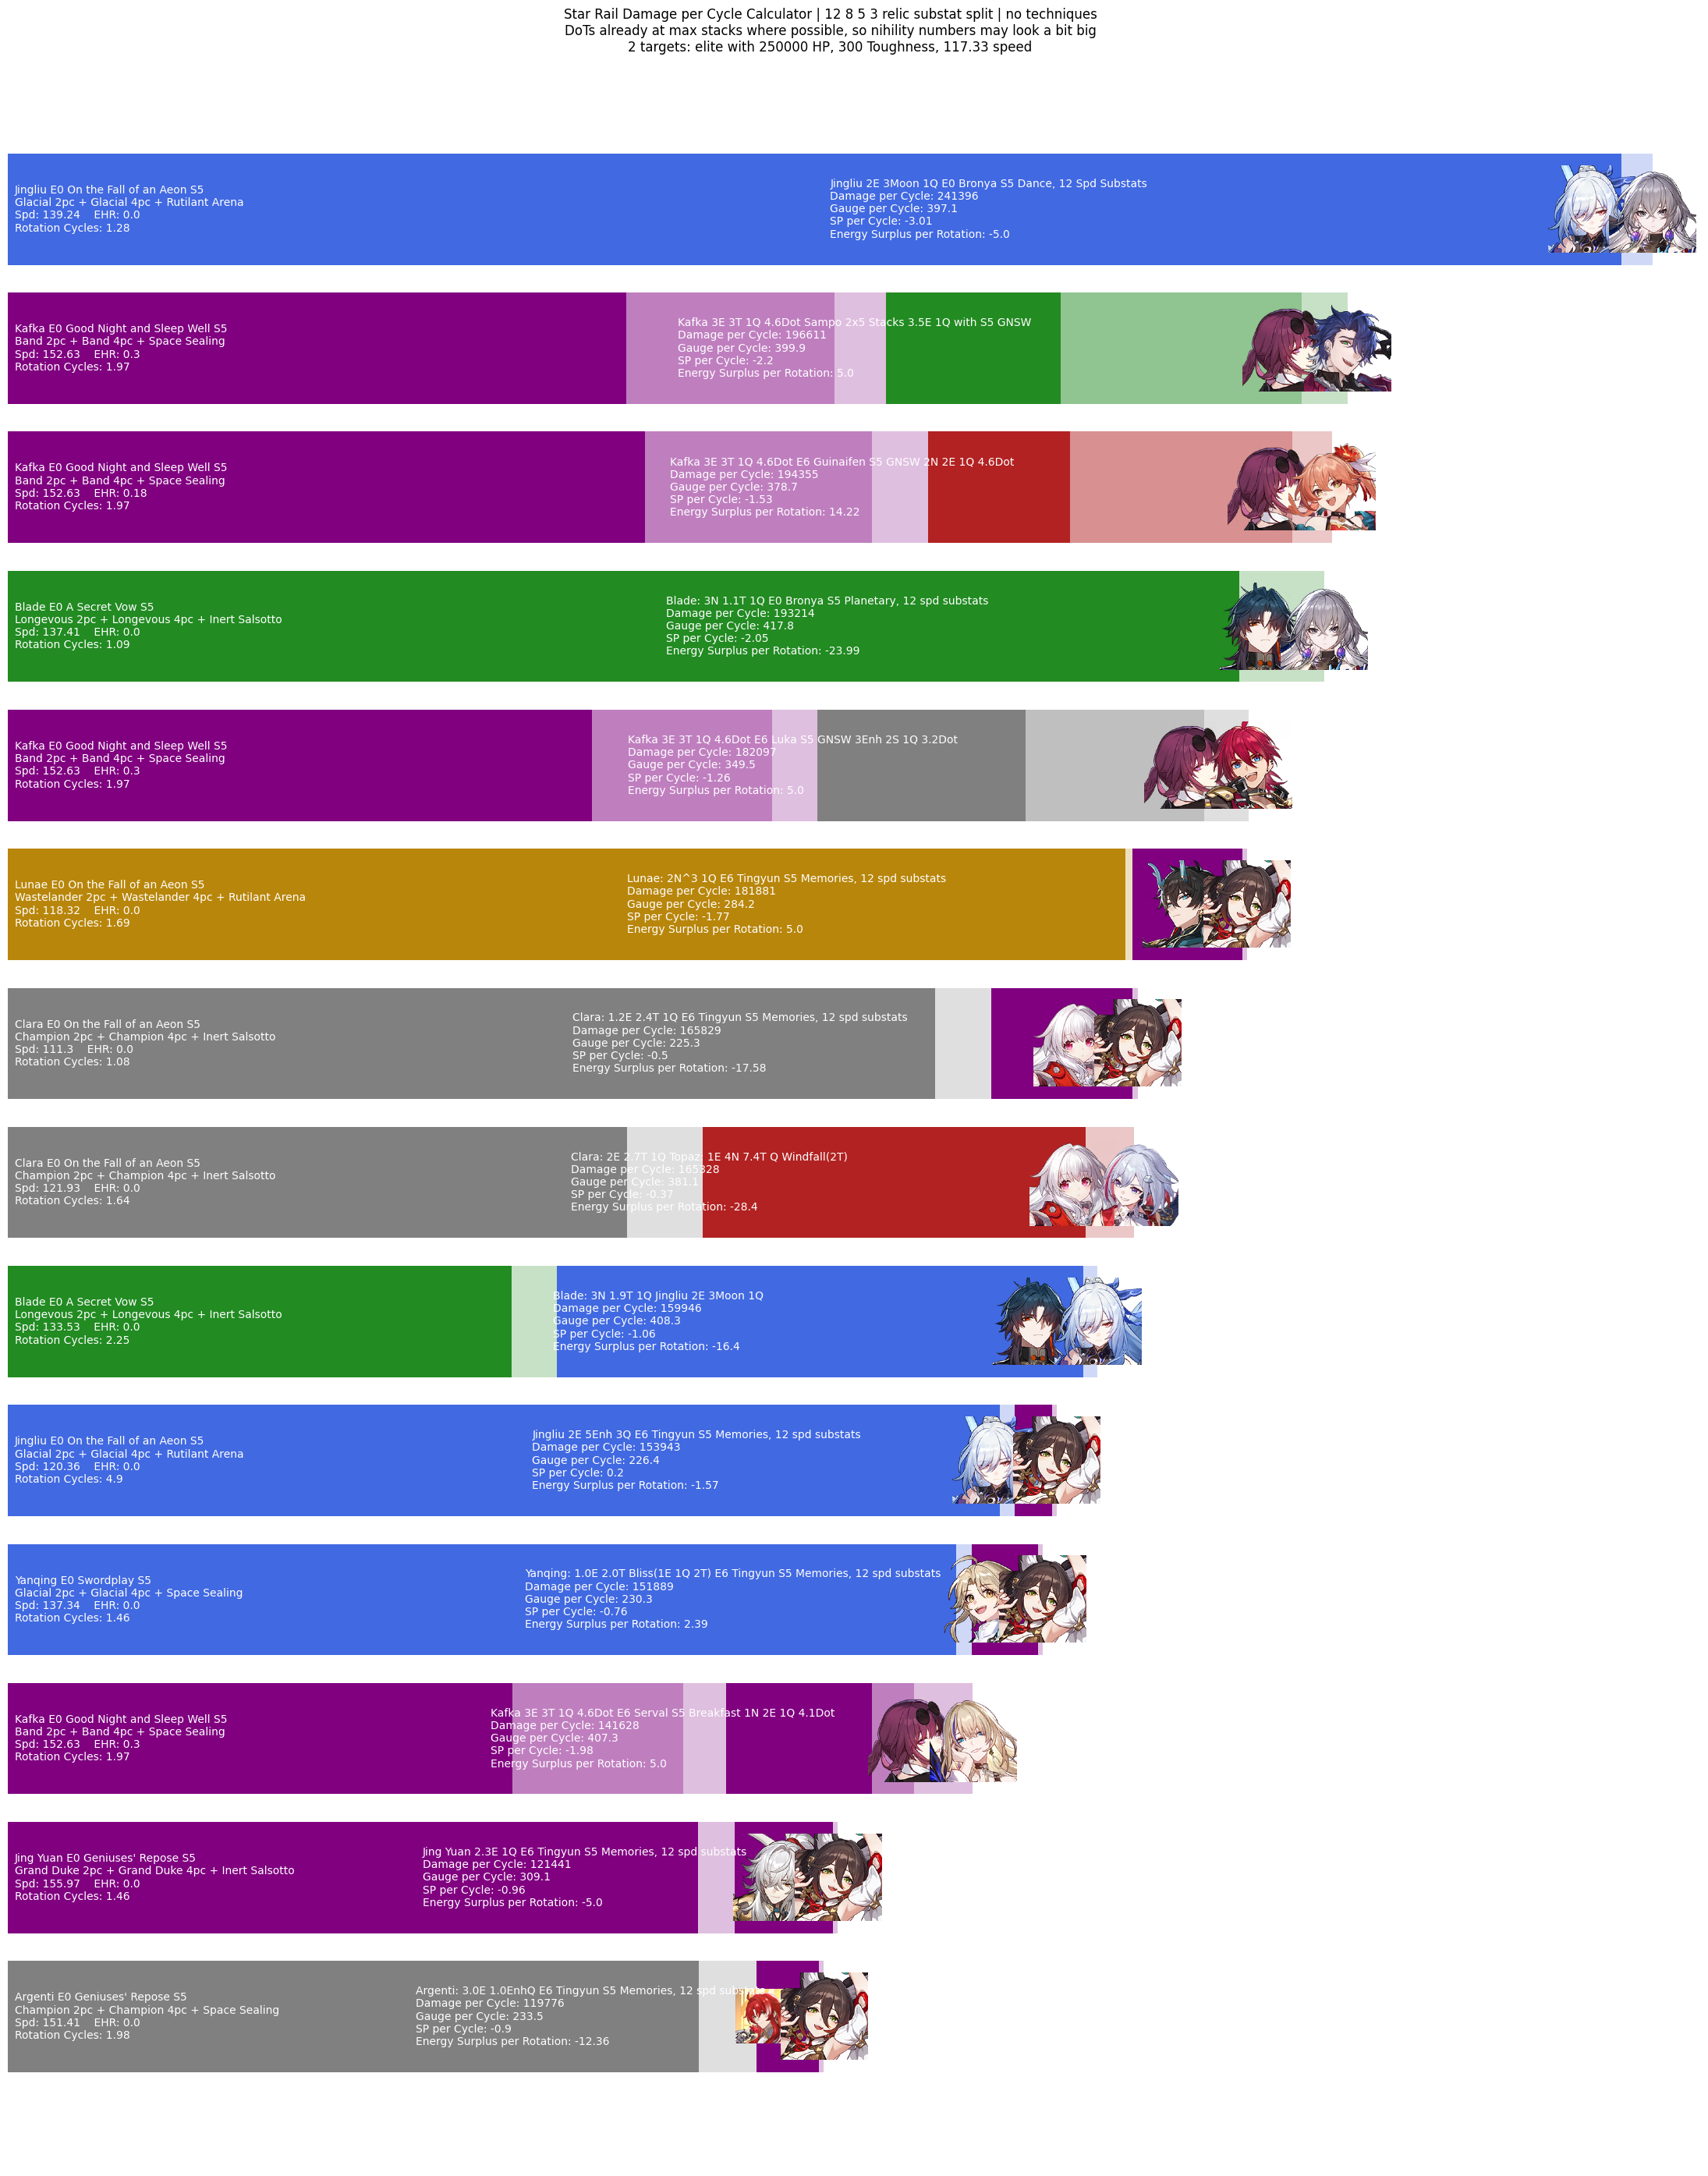

In [32]:
# Visualize
visualize(visualizationList, visualizerPath='visualizer\DuoVisual.png', **config)
    
from excelAPI.write2sheet import writeVisualizationList
writeVisualizationList(visualizationList,path='visualizer\DuoVisual.xlsx',sheetname='Duo vs Two')